# Direct S3 Access tutorial

Modified based on PO.DAAC tutorial S3-Access.ipynb https://github.com/podaac/tutorials/blob/0b70d4038a542c8911daf80e82ddfac0cf54b75f/notebooks/s3/S3-Access.ipynb

Focus on openning multiple granules using xarray.open_mfdataset.

In [1]:
import xarray as xr
import requests,os
import s3fs
import pylab as plt

## Authenticate with EDL and retrieve temporary S3 credentials:

You need a temporary S3 credential to access data in the cloud from within the AWS us-west-2 region. To do this, we use our earthdata login when calling a special API endpoint to receive this temporary token.

In [2]:
s3_cred_endpoint = {
    'podaac':'https://archive.podaac.earthdata.nasa.gov/s3credentials',
    'lpdaac':'https://data.lpdaac.earthdatacloud.nasa.gov/s3credentials'}

def get_temp_creds():
    temp_creds_url = s3_cred_endpoint['podaac']
    return requests.get(temp_creds_url).json()

creds = get_temp_creds()


In [3]:
s3 = s3fs.S3FileSystem(anon=False,key=creds['accessKeyId'], secret=creds['secretAccessKey'], token=creds['sessionToken'])

#############        examples

all_collection=sorted(s3.glob('s3://podaac-ops-cumulus-protected/*')) #list all po.daac collections, 
print('There are %i collections in POCLOUD. Examples: \n'%len(all_collection))

print(all_collection[:10],"\n") #delete [:3] to show short_names of all collections

mursst=s3.glob('s3://podaac-ops-cumulus-protected/MUR-JPL-L4-GLOB-v4.1/*nc') 
print('There are %i granules in MUR-JPL-L4.'%len(mursst))

swotL2ssh=s3.glob('s3://podaac-ops-cumulus-protected/SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_SCIENCE_V1/*nc') 
print('There are %i granules in SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_SCIENCE_V1.'%len(swotL2ssh))

preswot_llc4320=s3.glob('s3://podaac-ops-cumulus-protected/MITgcm_LLC4320_Pre-SWOT_JPL_L4_ACC_SMST_v1.0/*nc')
print('There are %i granules in MITgcm_LLC4320_Pre-SWOT_JPL_L4_ACC_SMST_v1.0.'%len(preswot_llc4320))

preswot_llc4320[:3]

There are 352 collections in POCLOUD. Examples: 

['podaac-ops-cumulus-protected/ABI_G16-STAR-L2P-v2.70', 'podaac-ops-cumulus-protected/ABI_G16-STAR-L3C-v2.70', 'podaac-ops-cumulus-protected/ABI_G17-STAR-L2P-v2.71', 'podaac-ops-cumulus-protected/ABI_G17-STAR-L3C-v2.71', 'podaac-ops-cumulus-protected/AHI_H08-STAR-L2P-v2.70', 'podaac-ops-cumulus-protected/AHI_H08-STAR-L3C-v2.70', 'podaac-ops-cumulus-protected/ALT_TIDE_GAUGE_L4_OST_SLA_US_WEST_COAST_DAILY', 'podaac-ops-cumulus-protected/AMSR2-REMSS-L2P-v8a', 'podaac-ops-cumulus-protected/AMSR2-REMSS-L2P_RT_v8a', 'podaac-ops-cumulus-protected/AMSR2-REMSS-L3U-v8a'] 

There are 7108 granules in MUR-JPL-L4.
There are 10218 granules in SWOT_SIMULATED_L2_KARIN_SSH_ECCO_LLC4320_SCIENCE_V1.
There are 429 granules in MITgcm_LLC4320_Pre-SWOT_JPL_L4_ACC_SMST_v1.0.


['podaac-ops-cumulus-protected/MITgcm_LLC4320_Pre-SWOT_JPL_L4_ACC_SMST_v1.0/LLC4320_pre-SWOT_ACC_SMST_20110913.nc',
 'podaac-ops-cumulus-protected/MITgcm_LLC4320_Pre-SWOT_JPL_L4_ACC_SMST_v1.0/LLC4320_pre-SWOT_ACC_SMST_20110914.nc',
 'podaac-ops-cumulus-protected/MITgcm_LLC4320_Pre-SWOT_JPL_L4_ACC_SMST_v1.0/LLC4320_pre-SWOT_ACC_SMST_20110915.nc']

In [4]:
#open a single SST file (the first one at 2002-06-01T09:00:00)

#data=xr.open_dataset(s3.open(mursst[0]))
#data=xr.open_dataset(s3.open(preswot_llc4320[0]))
data=xr.open_dataset(s3.open(swotL2ssh[0]))

data

<xarray.Dataset>
Dimensions:                                (num_lines: 9866, num_pixels: 71, num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 ...
    longitude                              (num_lines, num_pixels) float64 ...
    latitude_nadir                         (num_lines) float64 ...
    longitude_nadir                        (num_lines) float64 ...
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/92)
    time                                   (num_lines) datetime64[ns] ...
    time_tai                               (num_lines) datetime64[ns] ...
    ssh_karin                              (num_lines, num_pixels) float64 ...
    ssh_karin_uncert                       (num_lines, num_pixels) float32 ...
    ssha_karin                             (num_lines, num_pixels) float64 ...
    ssh_karin_2                            (num_lines, num_pixels) float64 ...
    ...                                     ...
    simulated_error_roll                   (num_lines, num_pixels) float64 ...
    simulated_error_phase                  (num_lines, num_pixels) float64 ...
    simulated_error_karin                  (num_lines, num_pixels) float64 ...
    simulated_error_timing                 (num_lines, num_pixels) float64 ...
    simulated_error_orbital                (num_lines, num_pixels) float64 ...
    simulated_error_troposphere            (num_lines, num_pixels) float64 ...
Attributes: (12/32)
    Conventions:                CF-1.7
    title:                      Level 2 Low Rate Sea Surface Height Data Prod...
    institution:                CNES/JPL
    source:                     Simulate product
    history:                    2021-09-23 08:42:48Z : Creation
    platform:                   SWOT
    ...                         ...
    right_last_longitude:       [131.81928697]
    right_last_latitude:        [77.03254381]
    wavelength:                 [0.0083858]
    orbit_solution:             POE
    ellipsoid_semi_major_axis:  [6378137.]
    ellipsoid_flattening:       [0.00335281]

In [36]:
#open multiple files all at once (the first ten in this example mursst[:10])

#fileset = [s3.open(file) for file in preswot_llc4320[:10]]
#fileset = [s3.open(file) for file in mursst[:10]]
fileset = [s3.open(file) for file in swotL2ssh[:5]]
#data = xr.open_mfdataset(fileset)   #, combine='by_coords', engine='h5netcdf' )
#data = xr.open_mfdataset(fileset, concat_dim=['time'], combine='nested', compat='override')   #, combine='by_coords', engine='h5netcdf' )
data = xr.open_mfdataset(fileset, concat_dim=['orbit'], combine='nested')   #, combine='by_coords', engine='h5netcdf' )


#concat_dim=['x', 'y'], combine='nested'

data
data.ssh_karin

#data.latitude[:100]




<xarray.DataArray 'ssh_karin' (orbit: 5, num_lines: 9866, num_pixels: 71)>
dask.array<concatenate, shape=(5, 9866, 71), dtype=float64, chunksize=(1, 9866, 71), chunktype=numpy.ndarray>
Coordinates:
    latitude         (orbit, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9866, 71), meta=np.ndarray>
    longitude        (orbit, num_lines, num_pixels) float64 dask.array<chunksize=(1, 9866, 71), meta=np.ndarray>
    latitude_nadir   (orbit, num_lines) float64 dask.array<chunksize=(1, 9866), meta=np.ndarray>
    longitude_nadir  (orbit, num_lines) float64 dask.array<chunksize=(1, 9866), meta=np.ndarray>
Dimensions without coordinates: orbit, num_lines, num_pixels
Attributes:
    long_name:      sea surface height
    standard_name:  sea surface height above reference ellipsoid
    units:          m
    valid_min:      [-15000000]
    valid_max:      [150000000]
    comment:        Fully corrected sea surface height measured by KaRIn. The...

In [37]:
#get a subset (California Current, upwelling region)
#data is sliced but not loaded into memory yet

#dsubset=data.Salt.sel(i=slice(1, 40), j=slice(1,10), k=slice(1,10) )
#dsubset=data.Salt.sel(i=slice(1, 40), j=slice(1,10), k=slice(1,10) )
#dsubset=data.analysed_sst.sel(lat=slice(30, 40), lon=slice(-130, -110) )
#dsubset=data.ssh_karin.sel(latitude=slice(1,40), longitude=slice(1,40) )
dsubset=data.ssh_karin.sel(orbit=slice(0,3), num_lines=slice(35,45), num_pixels=slice(10,15))
dsubset=data.ssh_karin.sel(orbit=slice(0,3), latitude=slice(35,45), num_pixels=slice(10,15))

dsubset

KeyError: 'no index found for coordinate latitude'

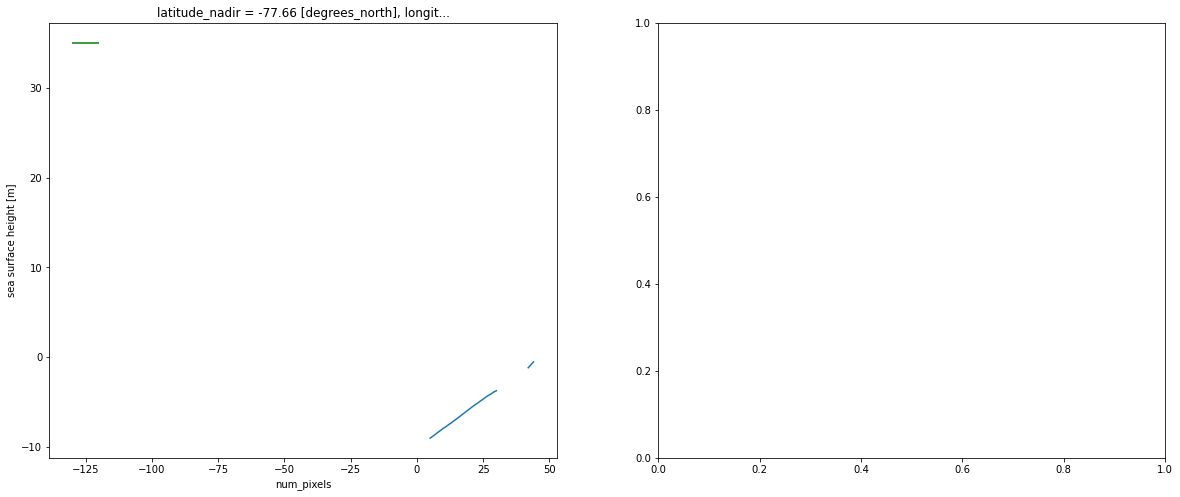

In [7]:
#plot an example of the sliced array
fig,ax=plt.subplots(1,2,figsize=(20,8))
dd=dsubset[0,...] #get the first time setp
#(dd-dd.mean()).plot(ax=ax[0])
dd.plot(ax=ax[0])

ax[0].hlines(35,-130,-120,color='g')

#dd=dsubset.sel(lat=35,lon=slice(-130,-120))
#(dd-dd.mean()).plot(ax=ax[1])